## [ PyTorch Practice ] </br>
This is lecture note of pyTorch  </br>
Code is from https://m.boostcourse.org/ai213/lectures/361797

### 1. numpy의 ndarray와 pytorch의 tensor는 유사함

In [3]:
# numpy - ndarray
import numpy as np
n_array = np.arange(10).reshape(2,5)
print(n_array)
print('n_dim : ', n_array.ndim, 'shape : ', n_array.shape)

# pytorch - tensor
import torch
t_array = torch.FloatTensor(n_array)
print(t_array)
print('n_dim : ', t_array.ndim, 'shape : ', t_array.shape, 'size : ', t_array.size())

[[0 1 2 3 4]
 [5 6 7 8 9]]
n_dim :  2 shape :  (2, 5)
tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
n_dim :  2 shape :  torch.Size([2, 5]) size :  torch.Size([2, 5])


### 2. tensor 생성은 list나 ndarray 사용 가능함

In [4]:
# list to tensor
data = [[3,5],[10,5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

In [5]:
# ndarray to tensor
nd_array = np.array(data)
tensor_array = torch.from_numpy(nd_array)
tensor_array


tensor([[ 3,  5],
        [10,  5]])

### 3. numpy와 pyTorch의 사용이 매우 유사함
- 기본적으로 tensor가 가질 수 있는 data type은 numpy와 동일
- 한 가지 차이가 있음 -> GPU 사용 가능 여부

In [8]:
data = [[3,5,20],[10,5,50],[1,5,10]]
x_data = torch.tensor(data)

print(x_data[1:])

print(x_data[:2,1:])

print(x_data.flatten())

print(torch.ones_like(x_data))

print(x_data.numpy())

print(x_data.shape)

print(x_data.dtype)

tensor([[10,  5, 50],
        [ 1,  5, 10]])
tensor([[ 5, 20],
        [ 5, 50]])
tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
[[ 3  5 20]
 [10  5 50]
 [ 1  5 10]]
torch.Size([3, 3])
torch.int64


### 4. pyTorch의 tensor는 GPU에 올려서 사용 가능

In [9]:
x_data.device # x_data를 저장하는 물리적인 메모리 위치 선택 가능

device(type='cpu')

In [11]:
if torch.cuda.is_available():
    x_data_cuda = x_data.to('cuda')
else : 
    x_data_cuda = x_data
x_data_cuda.device

device(type='cpu')

### 5. Tensor handling
- view : reshape과 동일하게 tensor의 shape 변환

In [8]:
tensor_ex = torch.rand(size=(2,3,2))
tensor_ex

tensor([[[0.0926, 0.5825],
         [0.5805, 0.6427],
         [0.4584, 0.4793]],

        [[0.4885, 0.3226],
         [0.7896, 0.6564],
         [0.5362, 0.1883]]])

In [9]:
# view와 reshape 의 유사한 역할
print(tensor_ex.view([-1,6]))
print(tensor_ex.reshape([-1,6]))

tensor([[0.0926, 0.5825, 0.5805, 0.6427, 0.4584, 0.4793],
        [0.4885, 0.3226, 0.7896, 0.6564, 0.5362, 0.1883]])
tensor([[0.0926, 0.5825, 0.5805, 0.6427, 0.4584, 0.4793],
        [0.4885, 0.3226, 0.7896, 0.6564, 0.5362, 0.1883]])


In [23]:
a = torch.zeros(3,2)
b = a.view(2,3) # view : 기존 변수(a)의 메모리 주소를 가져와서 표현하는 형태만 바꿔줌.
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [24]:
print(a)
print(b)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [21]:
a = torch.zeros(3,2)
b = a.t().reshape(6)  # reshape : 새로운 메모리 주소 할당.
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [22]:
print(a)
print(b)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([0., 0., 0., 0., 0., 0.])


- squeeze : 차원의 개수가 1인 차원을 삭제 (압축)
- unsqueeze : 차원의 개수가 1인 차원을 추가 -> index number를 파라미터로 받음

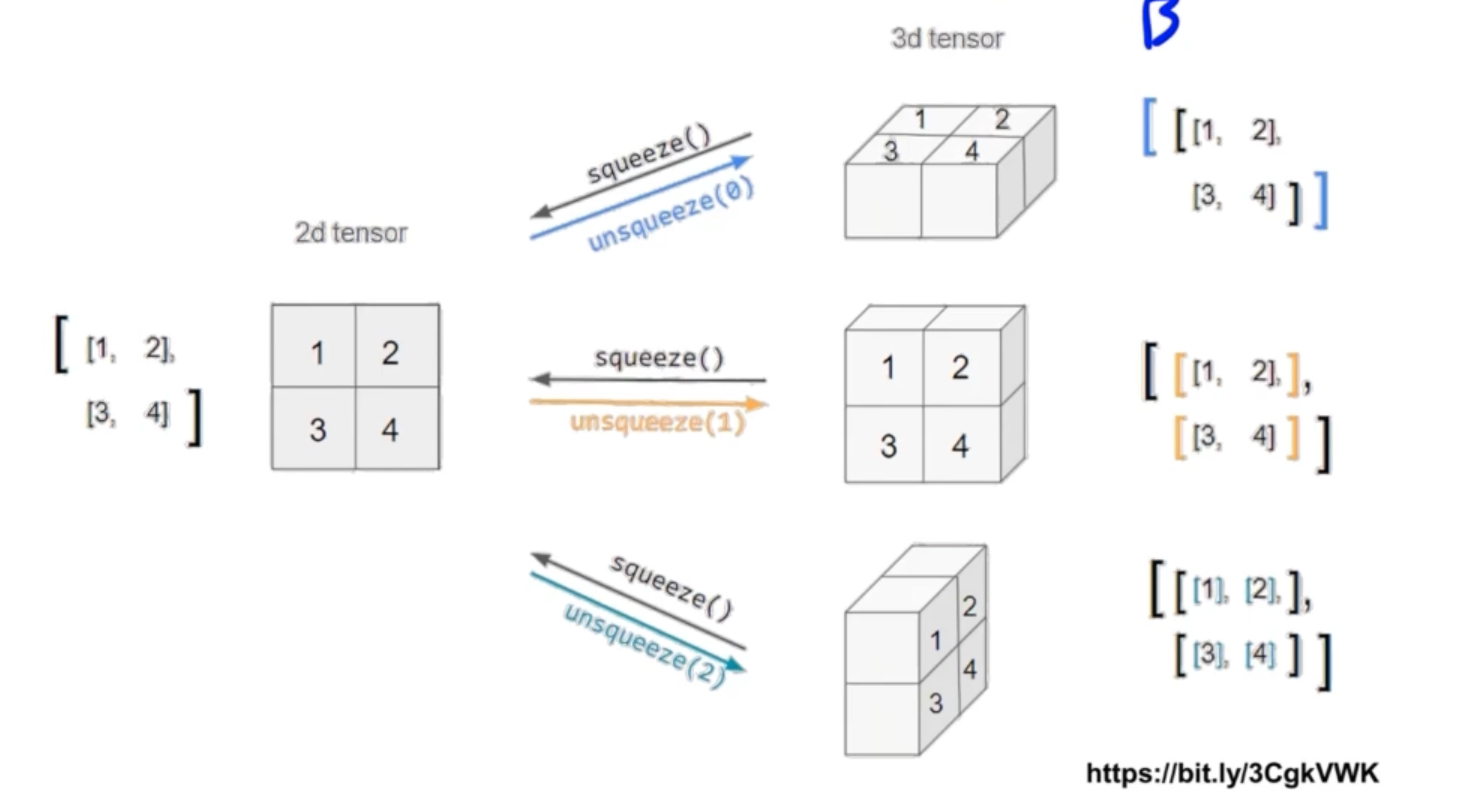

In [27]:
tensor_ex = torch.rand(size=(2,1,2))
print(tensor_ex)
print(tensor_ex.squeeze()) # 차원의 개수가 1인 차원을 삭제

tensor([[[0.5757, 0.5049]],

        [[0.6383, 0.9451]]])
tensor([[0.5757, 0.5049],
        [0.6383, 0.9451]])


In [29]:
tensor_ex = torch.rand(size=(2,2))
print(tensor_ex.unsqueeze(0).shape) # 0번째 index에 차원 추가
print(tensor_ex.unsqueeze(1).shape)
print(tensor_ex.unsqueeze(2).shape)

torch.Size([1, 2, 2])
torch.Size([2, 1, 2])
torch.Size([2, 2, 1])


### 6. Tensor Operations

기본적인 tensor의 operations는 numpy와 동일

In [31]:
n1 = np.arange(10).reshape(2,5)
t1 = torch.FloatTensor(n1)
t1

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [32]:
t1 + t1

tensor([[ 0.,  2.,  4.,  6.,  8.],
        [10., 12., 14., 16., 18.]])

In [33]:
t1-t1

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [34]:
t1+10

tensor([[10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])

In [35]:
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)

t1+t2 # 각 tensor의 dimension이 맞지 않으면 오류 발생

RuntimeError: The size of tensor a (5) must match the size of tensor b (2) at non-singleton dimension 1

##### 행렬 곱셈 연산은 함수는 dot이 아닌 mm(matrix multiplication) 사용
- vector끼리의 곱은 dot 가능 (mm 불가능)
- matrix 끼리의 곱은 mm 가능 (dot 불가능))

In [36]:
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)

In [37]:
t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [38]:
t1.dot(t2) ## tensor는 dot 연산 불가능

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [39]:
t1.matmul(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [40]:
a = torch.rand(10)
b = torch.rand(10)
a.dot(b)

tensor(2.0258)

In [41]:
a = torch.rand(10)
b = torch.rand(10)
a.mm(b)

RuntimeError: self must be a matrix

##### mm과 matmul의 broadcasting 지원 처리
- mm은 broadcasting 처리 지원 X
- matmul은 broadcasting 처리 지원 O

In [42]:
a = torch.rand(5,2,3)
b = torch.rand(5)
a.mm(b)

RuntimeError: self must be a matrix

In [45]:
a = torch.rand(5,2,3) # 첫번째 요소는 주로 batch를 의미
b = torch.rand(3)
a.matmul(b) # 2*3와 3*1의 연산 , 5개의 batch => 5*2*1

tensor([[0.1236, 0.0685],
        [0.0848, 0.1084],
        [0.0948, 0.1311],
        [0.2057, 0.0956],
        [0.1610, 0.1038]])

In [47]:
## a.matmul(b) 연산은 아래의 mm 연산들과 같음
a[0].mm(torch.unsqueeze(b,1))
a[1].mm(torch.unsqueeze(b,1))
a[2].mm(torch.unsqueeze(b,1))
a[3].mm(torch.unsqueeze(b,1))
a[4].mm(torch.unsqueeze(b,1))

tensor([[0.1610],
        [0.1038]])

### 7. nn.functional 모듈을 통해 다양한 수식 변환을 지원함

In [48]:
import torch
import torch.nn.functional as F

tensor = torch.FloatTensor([0.5,0.7,0.1])
h_tensor = F.softmax(tensor, dim=0)
h_tensor

tensor([0.3458, 0.4224, 0.2318])

In [54]:
y = torch.randint(5, (10,5)) # 0-4의 random int 값이 채워진 0*5 matrix
y_label = y.argmax(dim=1) # 행렬에서 가장 큰 값의 index를 뽑아서 1차원 vector로 표현

y_label

tensor([2, 1, 0, 0, 2, 1, 1, 0, 3, 0])

In [55]:
torch.nn.functional.one_hot(y_label)

tensor([[0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]])

##### cartesian product 
- 가능한 모든 경우의 수를 보여줌

In [56]:
import itertools
a = [1,2,3]
b = [4,5]
list(itertools.product(a,b))


[(1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)]

In [57]:
tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)
torch.cartesian_prod(tensor_a, tensor_b) 

tensor([[1, 4],
        [1, 5],
        [2, 4],
        [2, 5],
        [3, 4],
        [3, 5]])

### 8. AutoGrad
PyTorch의 핵심은 자동 미분의 지원 -> backward 함수 사용

$$ y = w^2  $$
$$ z = 10*y + 25 $$
$$ z = 10*w^2 + 25 $$

backward() 를 호출할 때, autograd는 이러한 변화도들을 계산하고 이를 각 텐서의 .grad 속성(attribute)에 저장

In [60]:

w = torch.tensor(2.0, requires_grad=True)  # 미분의 대상은 requires_grad = True로 해줌
y = w**2
z = 10*y + 25
z.backward() # 역전파 단계(backward pass)

w.grad # 마지막 줄을 미분하면 20*w, 처음에 w값을 2라고 정해주었으므로 => 답은 40

tensor(40.)

편미분의 경우

$$ Q = 3a^3 - b^2$$

In [66]:
## 편미분의 경우

a = torch.tensor([2.,3.], requires_grad=True)
b = torch.tensor([6.,4.], requires_grad=True)
Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad) # 편미분 시행 (a에 관한 미분, b에 관한 미분)

$$ \frac{ \partial  Q}{ \partial  a} = 9a^2 $$
$$ \frac{ \partial  Q}{ \partial  b} = -2b $$

In [64]:
a.grad # a에 대한 편미분

tensor([36., 81.])

In [65]:
b.grad # b에 대한 편미분

tensor([-12.,  -8.])